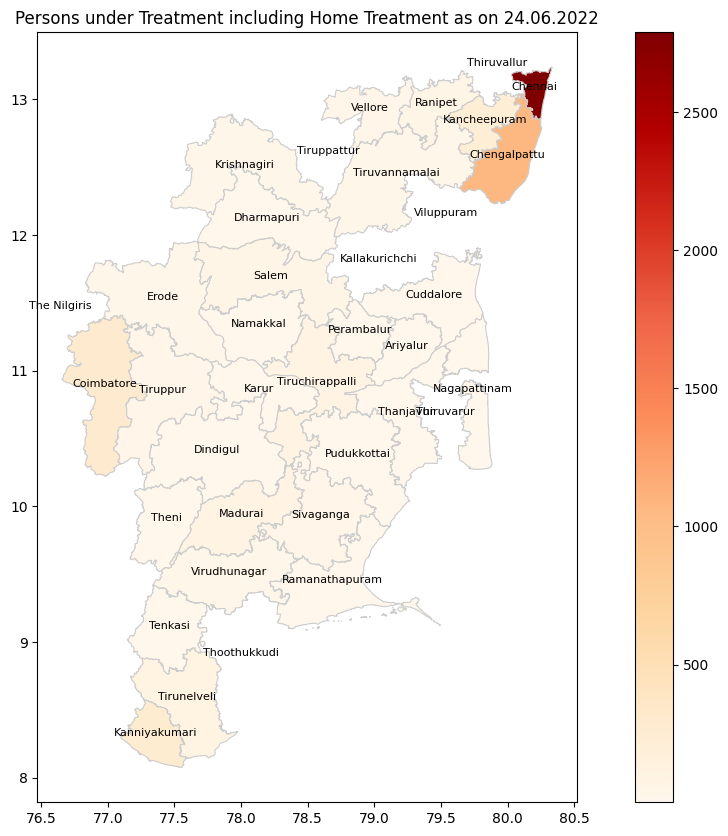

In [31]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


shapefile_path = "TAMIL+NADU_DISTRICTS/TAMIL NADU_DISTRICTS.shp"
map_df = gpd.read_file(shapefile_path)

data_path = "covid_data.csv"
data_df = pd.read_csv(data_path)


merged_df = map_df.set_index('dtname').join(data_df.set_index('District'))


fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_title('Persons under Treatment including Home Treatment as on 24.06.2022')


merged_df.plot(column='Persons under Treatment including Home Treatment as on 24.06.2022', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)


for idx, row in merged_df.iterrows():

    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row.name, ha='center', fontsize=8, color='black')
   
plt.show()